In [10]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import seaborn as sns # Graficos estadisticos
import pandas_profiling as ppr # ?????????
#import geopandas as gpd # Pandas para datos geograficos (Mapas!!)
#from fitter import Fitter # Ajuste de distribuciones de probs

In [13]:
%matplotlib inline

In [11]:
df = pd.read_csv('../Co2/CO2 Emissions_Canada.csv')

In [12]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [33]:
df.shape[0]

7385

In [14]:
df['CO2 Emissions(g/km)'].describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64

In [42]:
rangos_co2 = [95, 154, 212, 270, 523]
co2_bins = pd.cut(df['CO2 Emissions(g/km)'], bins=rangos_co2)

rangos_co2_count= co2_bins.value_counts()

In [43]:
rangos_co2_count

(212, 270]    2795
(270, 523]    2521
(154, 212]    1892
(95, 154]      177
Name: CO2 Emissions(g/km), dtype: int64

In [46]:
df['co2_bins'] = co2_bins

In [47]:
conteo_co2_x_fuel = (df[['co2_bins', 'Fuel Type']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['co2_bins', 'Fuel Type']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_co2_x_fuel.head()

,co2_bins,Fuel Type,conteo
0,"(95, 154]",D,0
1,"(95, 154]",E,1
2,"(95, 154]",N,0
3,"(95, 154]",X,166
4,"(95, 154]",Z,10


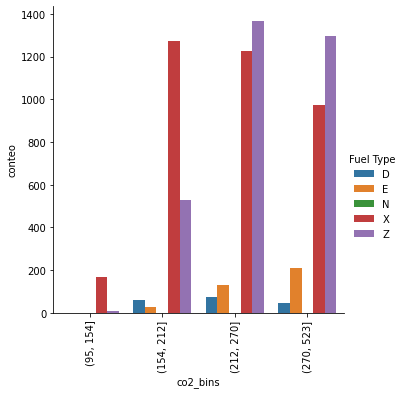

In [48]:
g = sns.catplot(
    data=conteo_co2_x_fuel, kind="bar",
    x="co2_bins", y="conteo", hue="Fuel Type",
)
g.set_xticklabels(rotation=90)
plt.show()

In [17]:
df['Engine Size(L)'].describe()



count    7385.000000
mean        3.160068
std         1.354170
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

In [18]:
rangos_cil = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cil_bins = pd.cut(df['Engine Size(L)'], bins=rangos_cil)

cil_bins_count = cil_bins.value_counts()

In [19]:
cil_bins_count

(1, 2]    2432
(2, 3]    1776
(3, 4]    1661
(5, 6]     650
(4, 5]     546
(6, 7]     291
(0, 1]      21
(8, 9]       5
(7, 8]       3
Name: Engine Size(L), dtype: int64

<AxesSubplot:>

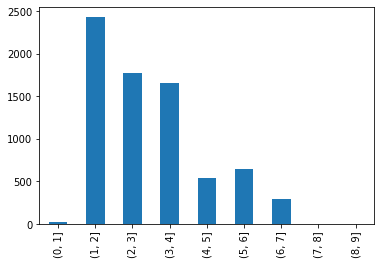

In [20]:
cil_bins_count.sort_index().plot(kind='bar')

# Correlación entre varibles y emisión de CO2

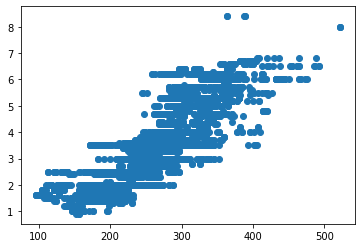

In [22]:
plt.scatter(x=df['CO2 Emissions(g/km)'], y=df['Engine Size(L)'])

In [23]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [24]:
df_vars = df[['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]

In [26]:
corr_matrix_var = ['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

len(corr_matrix_var)

8

In [27]:
corr_matrix  = df_vars[corr_matrix_var].corr()
corr_matrix

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


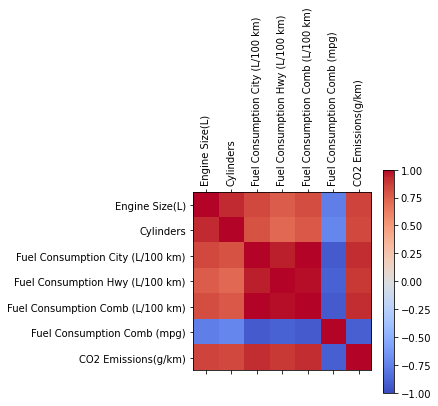

In [32]:
# Grafico de la matriz de correlacion

plt.rcParams['axes.grid'] = False  # Eliminar lineas dentro del grafico

plt.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Colocar nombres de variables en los ejes
plt.xticks(np.arange(corr_matrix.shape[0]), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(corr_matrix.shape[0]), corr_matrix.columns)

plt.colorbar() # Agregar un barra de colores como leyenda

plt.show()

# Agrupando por Marca de auto

In [37]:
df['Make'].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

In [39]:
conteo_marca_cil = (df[['Make', 'Engine Size(L)']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['Make', 'Engine Size(L)']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_marca_cil.head()

,Make,Engine Size(L),conteo
0,ACURA,1.5,2
1,ACURA,2.0,6
2,ACURA,2.4,17
3,ACURA,3.0,4
4,ACURA,3.5,41
